# House Price Prediction Regression Project

## Project Goal

## Load Modules / Libraries

In [8]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


In [11]:
train.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [12]:
test.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


## Know Your Data

# Data Integration

In [13]:
## concat train and test
df = pd.concat((train, test))
temp_df = df
print("Shape of df: ", df.shape)

Shape of df:  (2919, 81)


In [14]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [15]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


# EDA

In [16]:
# To show the all columns
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 85)

## Get the brief information of Dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

## Get the statistical  information 

In [18]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [19]:
int_features = df.select_dtypes(include=['int64']).columns
print("total number of integers features: ", int_features.shape[0])
print("integer features names: ", int_features.tolist())

total number of integers features:  26
integer features names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [20]:
float_features = df.select_dtypes(include=['float64']).columns
print("total number of floating features: ", float_features.shape[0])
print("Floating features names: ", float_features.tolist())

total number of floating features:  12
Floating features names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [21]:
cat_features = df.select_dtypes(include=['object']).columns
print("total number of categorical features: ", cat_features.shape[0])
print("categorical features names: ", cat_features.tolist())

total number of categorical features:  43
categorical features names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [22]:
# Set index as Id column
df = df.set_index("Id")

In [23]:
df.head(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0


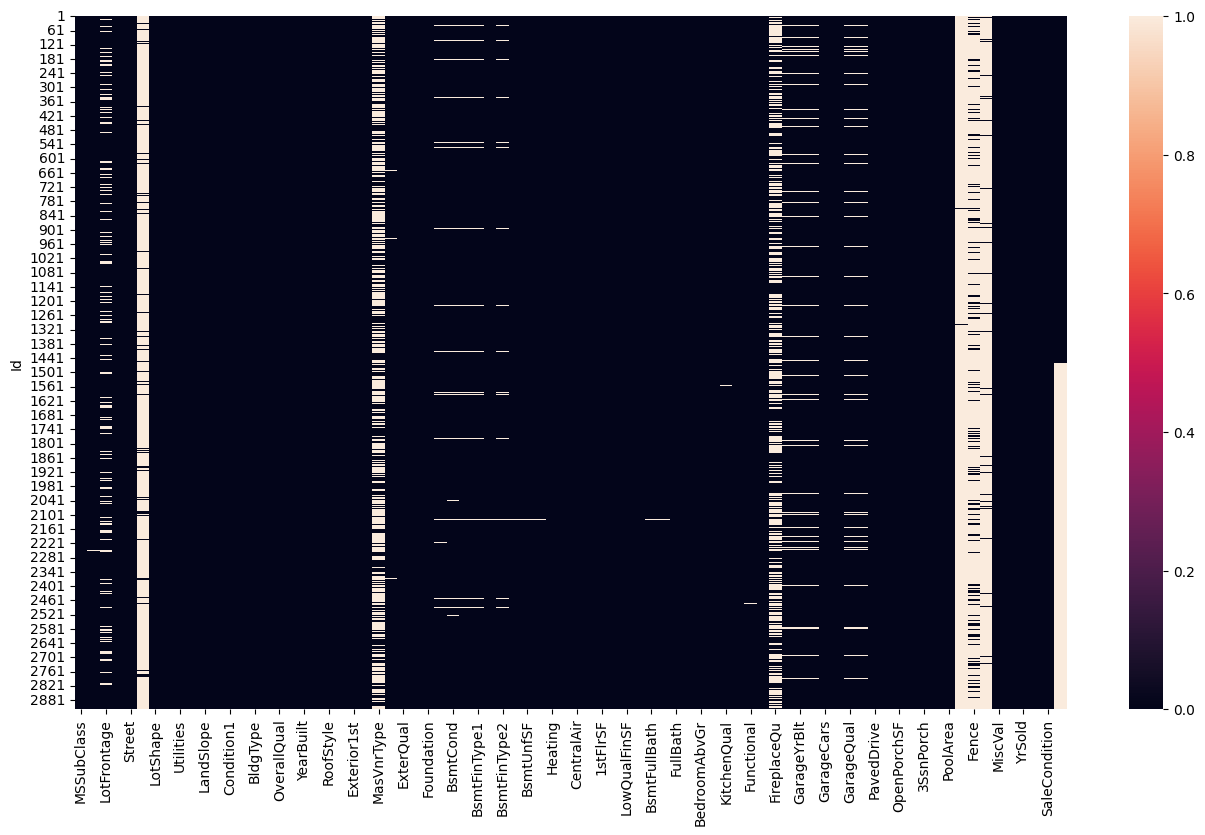

In [24]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_nullvalues.png")

In [25]:
null_percentage = df.isnull().sum()/df.shape[0] * 100
print(null_percentage)



MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## Drop Columns

In [26]:
miss_value = null_percentage[null_percentage > 50 ]
miss_value

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [27]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [28]:
miss_value = null_percentage[(null_percentage > 20) & (null_percentage < 51)]
miss_value

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [29]:
miss_value = null_percentage[(null_percentage > 5) & (null_percentage < 21)]
miss_value

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [30]:
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

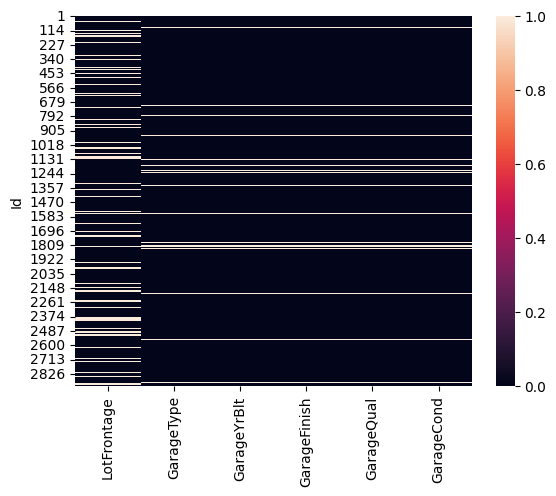

In [31]:
sns.heatmap(df[miss_value.keys()].isnull())

## missing value imputation

In [32]:
missing_value = null_percentage[null_percentage > 0]
print("Total missing value features = ", len(missing_value))

Total missing value features =  35


In [33]:
missing_value

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [34]:
cat_na_feat = missing_value[missing_value.keys().isin(cat_features)]
print("Total number of categorial missing features = ",len(cat_na_feat))
cat_na_feat

Total number of categorial missing features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [35]:
int_na_feat = missing_value[missing_value.keys().isin(int_features)]
print("Total number of integer missing features = ",len(int_na_feat))
int_na_feat

Total number of integer missing features =  0


Series([], dtype: float64)

In [36]:
float_na_feat = missing_value[missing_value.keys().isin(float_features)]
print("Total number of floating missing features = ",len(float_na_feat))
float_na_feat

Total number of floating missing features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Handling MSZoning = 0.137033

In [37]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

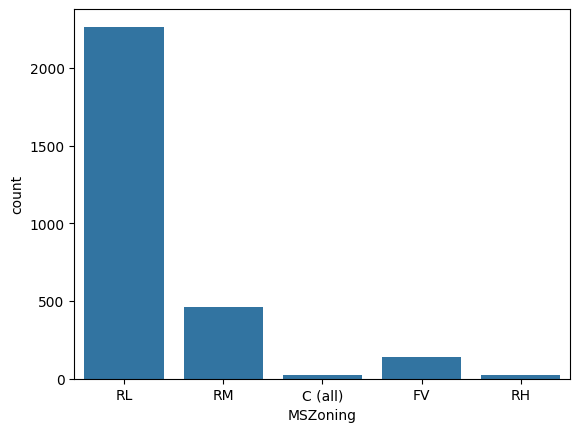

In [38]:
sns.countplot(x="MSZoning", data=df)


In [39]:
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [40]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning_mode, inplace=True)
df_mvi["MSZoning"].isnull().sum()


C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\2162387759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,mszoning_mode, inplace=True)


0

<Axes: xlabel='MSZoning', ylabel='count'>

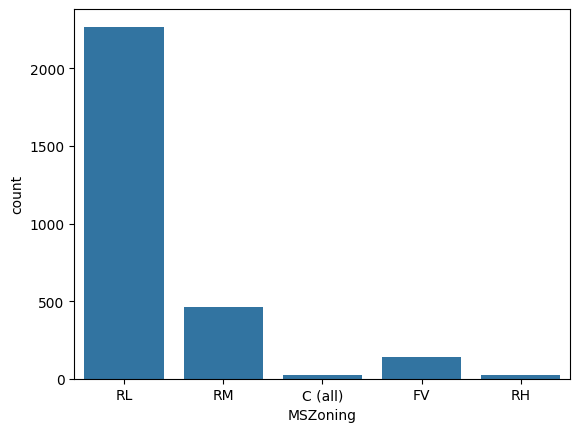

In [41]:
sns.countplot(x="MSZoning", data=df_mvi)

In [42]:
def oldnewcount(df, df_new, feature):
    plt.figure(figsize=(12, 5))  # Optional: wider layout
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=df)
    plt.title("Old Data")

    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, data=df_new)
    plt.title("New Data")

    plt.tight_layout()
    plt.show()


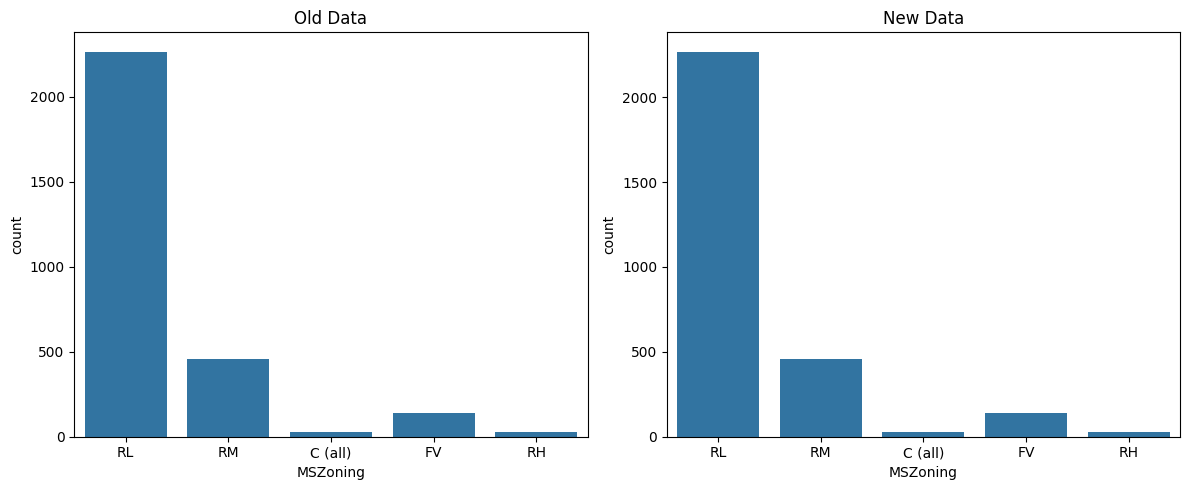

In [43]:
oldnewcount(df, df_mvi, "MSZoning")

## Handling Alley

In [44]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [45]:
alley_cont = "NA"
df_mvi["Alley"].replace(np.nan, alley_cont, inplace=True)
df_mvi["Alley"].isnull().sum()

C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\1473241795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan, alley_cont, inplace=True)


0

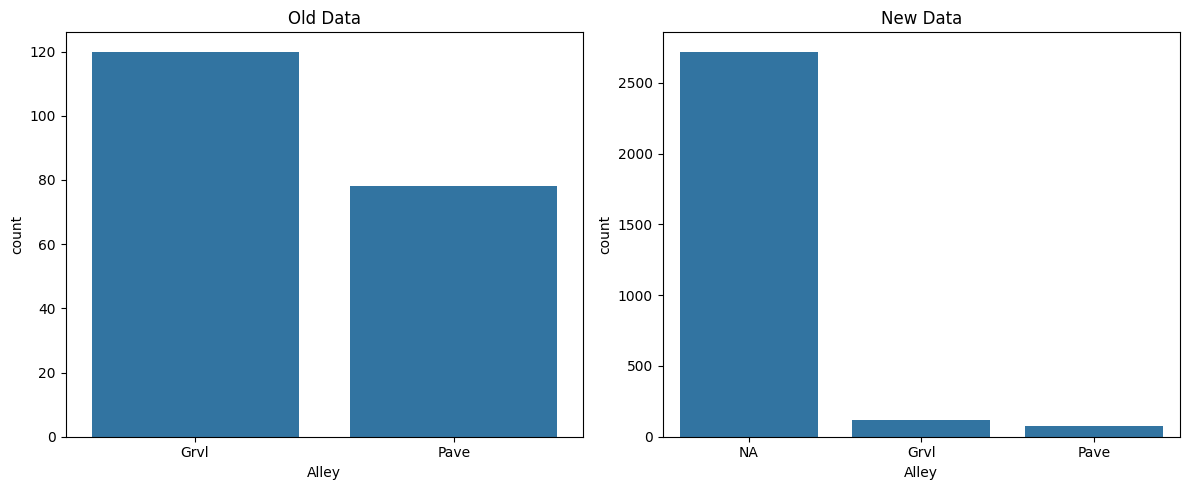

In [46]:
oldnewcount(df,df_mvi,"Alley")

### Handling LotFrontage 

In [47]:
def boxHistPlot(df, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(x=df)
    plt.subplot(122)
    sns.distplot(df)



C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\2010816230.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


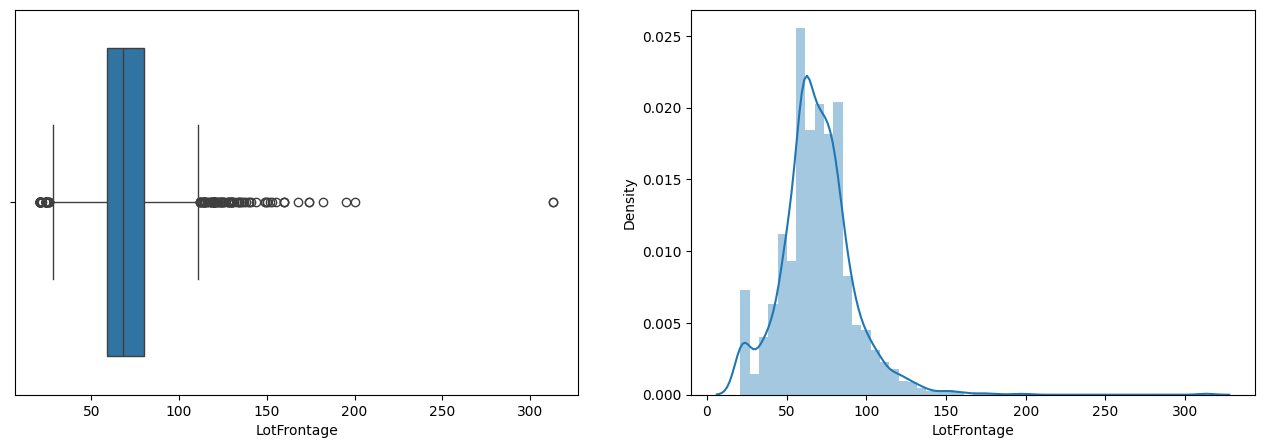

In [48]:
boxHistPlot(df["LotFrontage"])


In [49]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\2208704688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)


0

In [50]:
def oldnewbhplot(df, df_new, feature, figsize=(16,10)):
    plt.figure(figsize=figsize)

    # Boxplot - Old Data
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df[feature])
    plt.title("Old Data - Boxplot")
    
    # Histogram - Old Data
    plt.subplot(2, 2, 2)
    sns.histplot(df[feature], kde=True)
    plt.title("Old Data - Distribution")
    
    # Boxplot - New Data
    plt.subplot(2, 2, 3)
    sns.boxplot(x=df_new[feature])
    plt.title("New Data - Boxplot")
    
    # Histogram - New Data
    plt.subplot(2, 2, 4)
    sns.histplot(df_new[feature], kde=True)
    plt.title("New Data - Distribution")
    
    plt.tight_layout()
    plt.show()


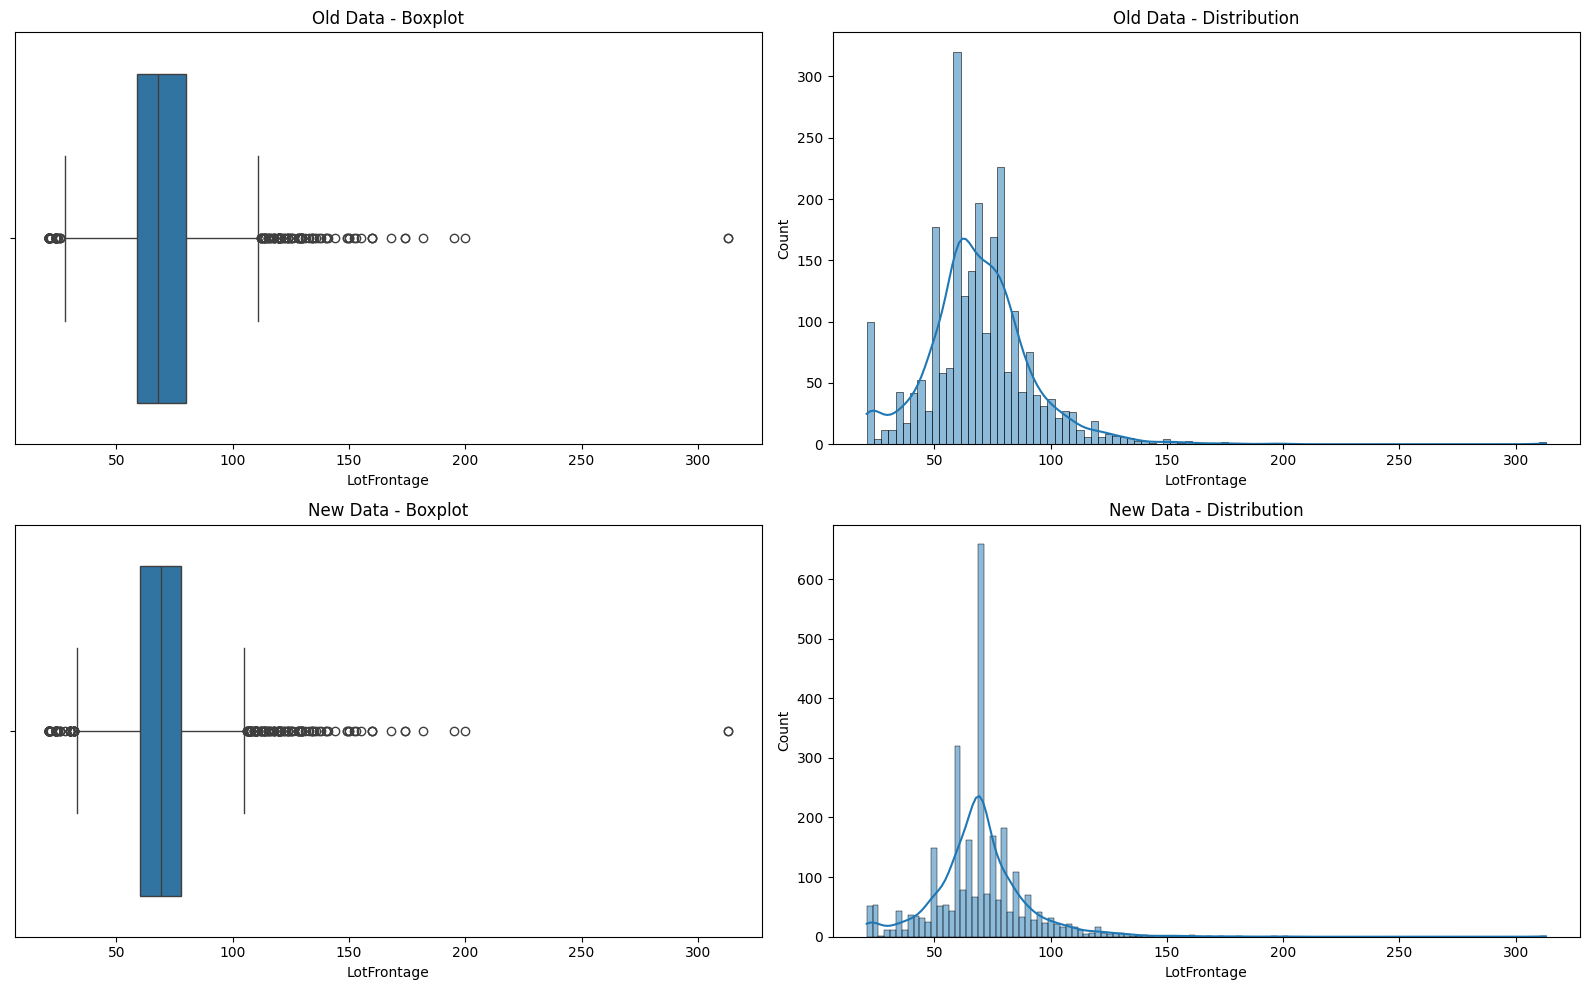

In [51]:
oldnewbhplot(df,df_mvi,"LotFrontage")

### Handling Utilities

In [52]:
df["Utilities"].value_counts()


Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [53]:
utilities_mode = df_mvi["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)
print(df_mvi["Utilities"].isnull().sum())


0


C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\378532503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)


### Handling Exterior

In [54]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [55]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [56]:
exterior2nd_mode = df_mvi["Exterior2nd"].mode()[0]
exterior1st_mode = df_mvi["Exterior1st"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace=True)
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace=True)
print(df_mvi["Exterior2nd"].isnull().sum())
print(df_mvi["Exterior1st"].isnull().sum())


0
0


C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\3961529146.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\3961529146.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

### Handling MasVnrArea and MasVnrType

<Axes: ylabel='Id'>

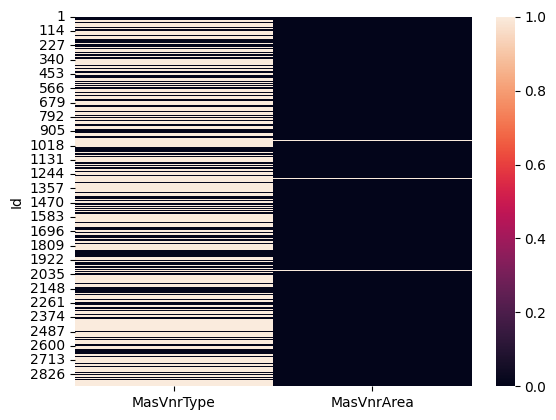

In [57]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [58]:
df[df[["MasVnrArea","MasVnrType"]].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,0.0,140.0,991.0,GasA,Ex,Y,SBrkr,1077,0,0,1077,1.0,0.0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1.0,205.0,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,34,0,0,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN


### Handling BSMT

In [59]:
cat_bsmt = ["BsmtQual","BsmtCond","BsmtExposure" ,"BsmtFinType1","BsmtFinType2 "]

num_bsmt =["BsmtFinSF1 ", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF", "BsmtFullBath","BsmtHalfBath"]




<Axes: ylabel='Id'>

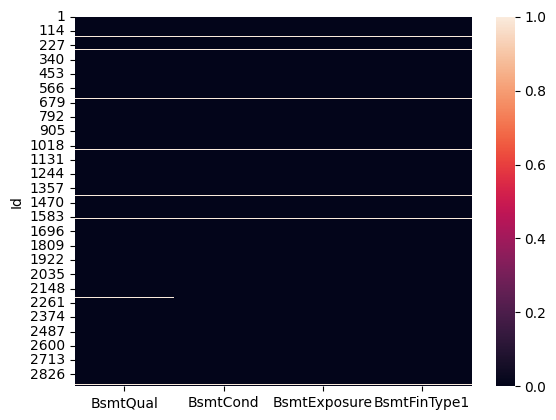

In [60]:
valid_cols = [col for col in cat_bsmt if col in df.columns]
sns.heatmap(df[valid_cols].isnull())



In [61]:
for feat in cat_bsmt:
    print(f"value count of{feat}:{df[feat].value_counts()}")

value count ofBsmtQual:BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count ofBsmtCond:BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count ofBsmtExposure:BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count ofBsmtFinType1:BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64


KeyError: 'BsmtFinType2 '

In [ ]:
bsmt_cont = "NA"
for feat in cat_bsmt:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)

In [63]:
valid_cols = [col for col in cat_bsmt if col in df_mvi.columns]
df_mvi[valid_cols].isnull().sum()


BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
dtype: int64

In [69]:

df.columns = df.columns.str.strip()


In [73]:
cat_bsmt = ["BsmtQual","BsmtCond","BsmtExposure" ,"BsmtFinType1","BsmtFinType2 "]

num_bsmt =["BsmtFinSF1 ", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF", "BsmtFullBath","BsmtHalfBath"]



In [74]:
num_bsmt = [col for col in num_bsmt if col in df.columns]


<Axes: ylabel='Id'>

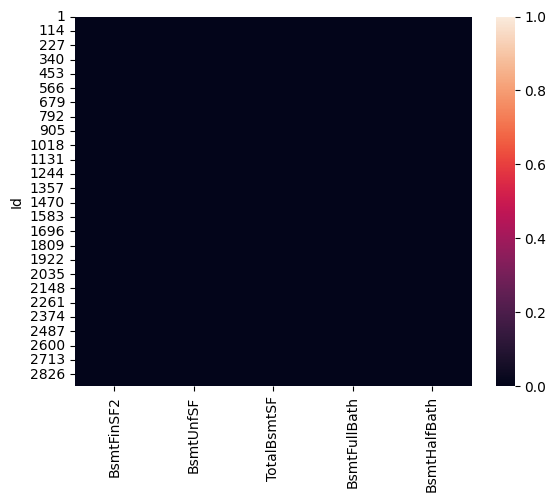

In [75]:
import seaborn as sns
sns.heatmap(df[num_bsmt].isnull())


In [77]:
# Strip spaces from all names in your column lists
cat_bsmt = [col.strip() for col in cat_bsmt]
num_bsmt = [col.strip() for col in num_bsmt]

# Filter only valid columns
cat_bsmt = [col for col in cat_bsmt if col in df.columns]
num_bsmt = [col for col in num_bsmt if col in df.columns]


In [78]:
df_bsmt = df[cat_bsmt + num_bsmt]
df_bsmt[df_bsmt.isnull().any(axis=1)]



,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2805,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2825,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [80]:
bsmt_num = 0 
for feat in num_bsmt:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace = True)

C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\615387051.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_num, inplace = True)


In [81]:
df_mvi[num_bsmt].isnull().sum()

BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### Handling Electrical


In [90]:
# Low missing %, use mode
for col in ['Electrical', 'KitchenQual', 'Functional', 'SaleType']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fireplace missing = no fireplace
df['FireplaceQu'].fillna('None', inplace=True)

# Garage-related: fill as 'None' for no garage
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    df[col].fillna('None', inplace=True)

# Pool, Fence, MiscFeature: almost always missing, so fill as 'None'
for col in ['PoolQC', 'Fence', 'MiscFeature']:
    df[col].fillna('None', inplace=True)


C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\974037182.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\974037182.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [91]:
print(df[['Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
          'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']].isnull().sum())


Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64


## Feature Transformation

In [93]:

for_num = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]

for feat in for_num:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [94]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [98]:
df_mvi["MoSold"]=df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [99]:
for feat in for_num:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [100]:
for feat in for_num:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")
    

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


### Convert Categorical Features Into Numerical Feature 

### Ordinal Encoding

In [103]:
from pandas.api.types import CategoricalDtype

# Define ordered category type
qual_cat = CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)

# Convert column to categorical with order
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(qual_cat)

# Now extract numerical codes
df_mvi["ExterQual_Code"] = df_mvi["ExterQual"].cat.codes


In [105]:
df_mvi["ExterQual"].unique()

['Gd', 'TA', 'Ex', 'Fa']
Categories (5, object): ['Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']

In [106]:
from pandas.api.types import CategoricalDtype

exposure_order = ["No", "Mn", "Av", "Gd"]
bsmt_exp_cat = CategoricalDtype(categories=exposure_order, ordered=True)


In [107]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(bsmt_exp_cat)
df_mvi["BsmtExposure_Code"] = df_mvi["BsmtExposure"].cat.codes


In [108]:
df_mvi["BsmtExposure"].value_counts()


BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

In [109]:
from pandas.api.types import CategoricalDtype

qual_order = ["Po", "Fa", "TA", "Gd", "Ex"]  # Poor < Fair < Typical < Good < Excellent
exposure_order = ["No", "Mn", "Av", "Gd"]    # None < Minimum < Average < Good
functional_order = ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"]
paved_drive_order = ["N", "P", "Y"]
utilities_order = ["ELO", "NoSeWa", "NoSewr", "All"]


In [110]:
# Fill NA with lowest category if meaning is "None"
fill_none_cols = ['FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
for col in fill_none_cols:
    df_mvi[col].fillna("Po", inplace=True)  # or use "None" if you prefer separate category

# BsmtFinType1/2 may have their own order, but filling NA with lowest category
df_mvi['BsmtFinType1'].fillna("Unf", inplace=True)
df_mvi['BsmtFinType2'].fillna("Unf", inplace=True)


C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\3608893307.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[col].fillna("Po", inplace=True)  # or use "None" if you prefer separate category
C:\Users\aayus\AppData\Local\Temp\ipykernel_26564\3608893307.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [111]:
# Apply same quality order
qual_cols = ['ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
             'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

for col in qual_cols:
    dtype = CategoricalDtype(categories=qual_order, ordered=True)
    df_mvi[col] = df_mvi[col].astype(dtype)
    df_mvi[col + "_Code"] = df_mvi[col].cat.codes

# BsmtExposure
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=exposure_order, ordered=True))
df_mvi["BsmtExposure_Code"] = df_mvi["BsmtExposure"].cat.codes

# BsmtFinType1/2: Unf < LwQ < Rec < BLQ < ALQ < GLQ
bsmt_fin_order = ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
for col in ['BsmtFinType1', 'BsmtFinType2']:
    dtype = CategoricalDtype(categories=bsmt_fin_order, ordered=True)
    df_mvi[col] = df_mvi[col].astype(dtype)
    df_mvi[col + "_Code"] = df_mvi[col].cat.codes

# Functional
df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories=functional_order, ordered=True))
df_mvi["Functional_Code"] = df_mvi["Functional"].cat.codes

# GarageFinish
garage_finish_order = ["Unf", "RFn", "Fin"]
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=garage_finish_order, ordered=True))
df_mvi["GarageFinish_Code"] = df_mvi["GarageFinish"].cat.codes

# PavedDrive
df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories=paved_drive_order, ordered=True))
df_mvi["PavedDrive_Code"] = df_mvi["PavedDrive"].cat.codes

# Utilities
df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories=utilities_order, ordered=True))
df_mvi["Utilities_Code"] = df_mvi["Utilities"].cat.codes


In [114]:
# List of original categorical columns you encoded
categorical_cols = [
    'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'Functional', 'GarageFinish', 'PavedDrive', 'Utilities'
]

# Drop them from the DataFrame
df_mvi.drop(columns=categorical_cols, inplace=True)


In [115]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSSubClass         2919 non-null   object  
 1   MSZoning           2919 non-null   object  
 2   LotFrontage        2919 non-null   float64 
 3   LotArea            2919 non-null   int64   
 4   Street             2919 non-null   object  
 5   Alley              2919 non-null   object  
 6   LotShape           2919 non-null   object  
 7   LandContour        2919 non-null   object  
 8   LotConfig          2919 non-null   object  
 9   LandSlope          2919 non-null   object  
 10  Neighborhood       2919 non-null   object  
 11  Condition1         2919 non-null   object  
 12  Condition2         2919 non-null   object  
 13  BldgType           2919 non-null   object  
 14  HouseStyle         2919 non-null   object  
 15  OverallQual        2919 non-null   int64   
 16  OverallCond

### one hot encoding for Nomical Categorical Data

In [116]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data types features: ", len(object_features))

print("Features: \n", object_features)

Total object data types features:  32
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [117]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,NaN,NaN,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NaN,NaN,May,2007,WD,Normal


In [119]:
df_encod = pd.get_dummies(df_encod, columns = object_features, prefix = object_features, drop_first =  True)

In [127]:
print(df_encod[['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']].sum())


MSZoning_FV     139
MSZoning_RH      26
MSZoning_RL    2269
MSZoning_RM     460
dtype: int64


In [129]:
print(df_encod[['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']].head())


    MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
Id                                                    
1         False        False         True        False
2         False        False         True        False
3         False        False         True        False
4         False        False         True        False
5         False        False         True        False


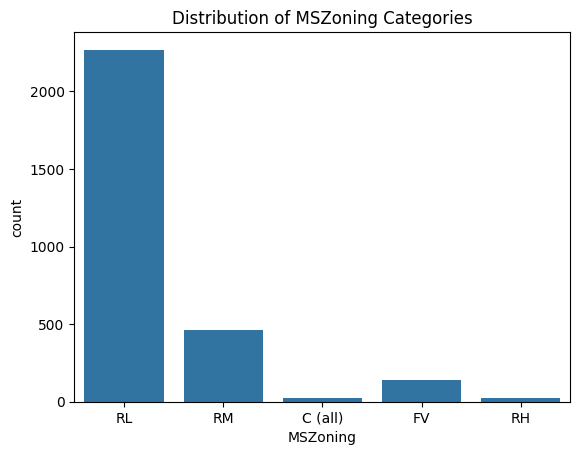

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of the original zoning if available
sns.countplot(data=df_mvi, x="MSZoning")
plt.title("Distribution of MSZoning Categories")
plt.show()


In [131]:
df_encod.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,ExterQual_Code,BsmtExposure_Code,ExterCond_Code,BsmtQual_Code,BsmtCond_Code,HeatingQC_Code,KitchenQual_Code,FireplaceQu_Code,GarageQual_Code,GarageCond_Code,PoolQC_Code,BsmtFinType1_Code,BsmtFinType2_Code,Functional_Code,GarageFinish_Code,PavedDrive_Code,Utilities_Code,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodA

In [132]:
df_encod.shape


(2919, 510)

In [134]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_encod, test_size=0.2, random_state=42)


In [135]:
len_train = df_train.shape[0]
print(len_train)


2335


In [137]:
# Step 1: Determine how many rows are from the training set
len_train = train.shape[0]

# Step 2: Ensure SalePrice is present
assert "SalePrice" in df.columns, "SalePrice column is missing!"

# Step 3: Apply one-hot encoding AFTER combining
df_encod = pd.get_dummies(df, drop_first=True)

# Step 4: Split again
x_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod["SalePrice"][:len_train]
x_test = df_encod[len_train:].drop("SalePrice", axis=1)

# Step 5: Print shapes
print("Shape of x_train data :", x_train.shape)
print("Shape of y_train data :", y_train.shape)
print("Shape of x_test data  :", x_test.shape)


Shape of x_train data : (1460, 252)
Shape of y_train data : (1460,)
Shape of x_test data  : (1459, 252)


### Feature Scaling

In [139]:
sc = StandardScaler()
sc.fit(x_train)

# formula z = (x-u)/s
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)


In [140]:
sc.mean_

array([5.68972603e+01, 7.00499584e+01, 1.05168281e+04, 6.09931507e+00,
       5.57534247e+00, 1.97126781e+03, 1.98486575e+03, 1.03685262e+02,
       4.43639726e+02, 4.65493151e+01, 5.67240411e+02, 1.05742945e+03,
       1.16262671e+03, 3.46992466e+02, 5.84452055e+00, 1.51546370e+03,
       4.25342466e-01, 5.75342466e-02, 1.56506849e+00, 3.82876712e-01,
       2.86643836e+00, 1.04657534e+00, 6.51780822e+00, 6.13013699e-01,
       1.97850616e+03, 1.76712329e+00, 4.72980137e+02, 9.42445205e+01,
       4.66602740e+01, 2.19541096e+01, 3.40958904e+00, 1.50609589e+01,
       2.75890411e+00, 4.34890411e+01, 6.32191781e+00, 2.00781575e+03,
       4.45205479e-02, 1.09589041e-02, 7.88356164e-01, 1.49315068e-01,
       9.95890411e-01, 2.80821918e-02, 2.80821918e-02, 6.84931507e-03,
       6.33561644e-01, 3.42465753e-02, 2.46575342e-02, 8.97945205e-01,
       6.84931507e-04, 6.43835616e-02, 3.21917808e-02, 2.73972603e-03,
       7.20547945e-01, 4.45205479e-02, 8.90410959e-03, 1.36986301e-03,
      

In [141]:
sc.n_features_in_

252

In [142]:
sc.n_samples_seen_

array([1460, 1201, 1460, 1460, 1460, 1460, 1460, 1452, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1379, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 14

In [143]:
sc.scale_

array([4.22860820e+01, 2.42746394e+01, 9.97784611e+03, 1.38252284e+00,
       1.11241818e+00, 3.01925588e+01, 2.06383353e+01, 1.81003845e+02,
       4.55941866e+02, 1.61264017e+02, 4.41715605e+02, 4.38555057e+02,
       3.86455322e+02, 4.36378914e+02, 4.86064268e+01, 5.25300394e+02,
       5.18732867e-01, 2.38670868e-01, 5.50727099e-01, 5.02713131e-01,
       8.15498620e-01, 2.20262727e-01, 1.62483655e+00, 6.44445572e-01,
       2.46807711e+01, 7.47059036e-01, 2.13731608e+02, 1.25295863e+02,
       6.62333334e+01, 6.10982138e+01, 2.93072887e+01, 5.57383170e+01,
       4.01635452e+01, 4.95953090e+02, 2.70270015e+00, 1.32764022e+00,
       2.06248561e-01, 1.04109589e-01, 4.08473650e-01, 3.56398764e-01,
       6.39742160e-02, 1.65207694e-01, 1.65207694e-01, 8.24766752e-02,
       4.81831181e-01, 1.81861891e-01, 1.55079142e-01, 3.02720355e-01,
       2.61622319e-02, 2.45434958e-01, 1.76509122e-01, 5.22706412e-02,
       4.48729990e-01, 2.06248561e-01, 9.39405473e-02, 3.69863014e-02,
      

In [144]:
sc.var_

array([1.78811273e+03, 5.89258120e+02, 9.95574129e+07, 1.91136939e+00,
       1.23747420e+00, 9.11590608e+02, 4.25940882e+02, 3.27623920e+04,
       2.07882985e+05, 2.60060832e+04, 1.95112676e+05, 1.92330538e+05,
       1.49347716e+05, 1.90426557e+05, 2.36258473e+03, 2.75940503e+05,
       2.69083787e-01, 5.69637831e-02, 3.03300338e-01, 2.52720492e-01,
       6.65038000e-01, 4.85156690e-02, 2.64009383e+00, 4.15310096e-01,
       6.09140462e+02, 5.58097204e-01, 4.56812003e+04, 1.56990532e+04,
       4.38685445e+03, 3.73299173e+03, 8.58917168e+02, 3.10675998e+03,
       1.61311037e+03, 2.45969468e+05, 7.30458810e+00, 1.76262854e+00,
       4.25384688e-02, 1.08388065e-02, 1.66850722e-01, 1.27020079e-01,
       4.09270032e-03, 2.72935823e-02, 2.72935823e-02, 6.80240195e-03,
       2.32161287e-01, 3.30737474e-02, 2.40495403e-02, 9.16396134e-02,
       6.84462376e-04, 6.02383186e-02, 3.11554701e-02, 2.73221993e-03,
       2.01358604e-01, 4.25384688e-02, 8.82482642e-03, 1.36798649e-03,
      

In [145]:
sc.with_mean

True

In [147]:
sc.with_std

True

### train

In [152]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Impute missing values using median (returns NumPy arrays)
imputer = SimpleImputer(strategy="median")
x_train_imputed_array = imputer.fit_transform(x_train)
x_test_imputed_array = imputer.transform(x_test)

# Convert back to DataFrame with dummy column names
x_train_imputed = pd.DataFrame(x_train_imputed_array)
x_test_imputed = pd.DataFrame(x_test_imputed_array)


In [153]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Train Gradient Boosting model
gbr_model = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.05,
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=15,
    min_samples_split=10,
    loss='huber',
    random_state=42
)

gbr_model.fit(x_train_imputed, y_train)

# Evaluate using cross-validation
scores = cross_val_score(gbr_model, x_train_imputed, y_train, scoring="neg_root_mean_squared_error", cv=5)
print("Cross-validated RMSE:", -scores.mean())

# Predict
gbr_preds = gbr_model.predict(x_test_imputed)

# Save submission
submission = pd.DataFrame({
    "Id": test["Id"].values,  # Convert Series to array if needed
    "SalePrice": gbr_preds
})
submission.to_csv("gbr_submission.csv", index=False)
print("Submission saved as gbr_submission.csv")


Cross-validated RMSE: 27247.266947395146
Submission saved as gbr_submission.csv


In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(x_train_imputed, y_train)

# Best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

# Use the best model
best_gbr = grid_search.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE: 25118.06429196061


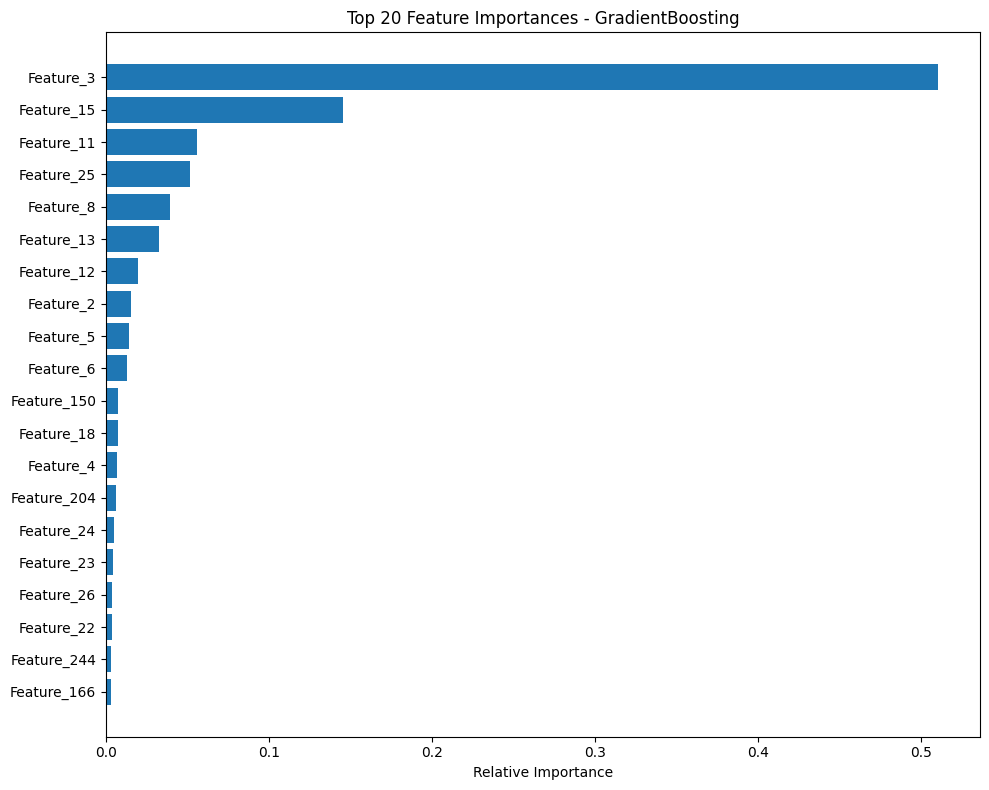

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Define fallback feature names
try:
    feature_names = x_train.columns  # Works only if x_train is a DataFrame
except AttributeError:
    feature_names = [f'Feature_{i}' for i in range(x_train_imputed.shape[1])]

# Plot top 20 features
importances = best_gbr.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20

plt.figure(figsize=(10, 8))
plt.title("Top 20 Feature Importances - GradientBoosting")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [157]:
import joblib

# Save the model to a file
joblib.dump(best_gbr, "gradient_boosting_model.pkl")

print("Model saved as 'gradient_boosting_model.pkl'")


Model saved as 'gradient_boosting_model.pkl'


In [158]:
# Predict on training data
train_preds = best_gbr.predict(x_train_imputed)


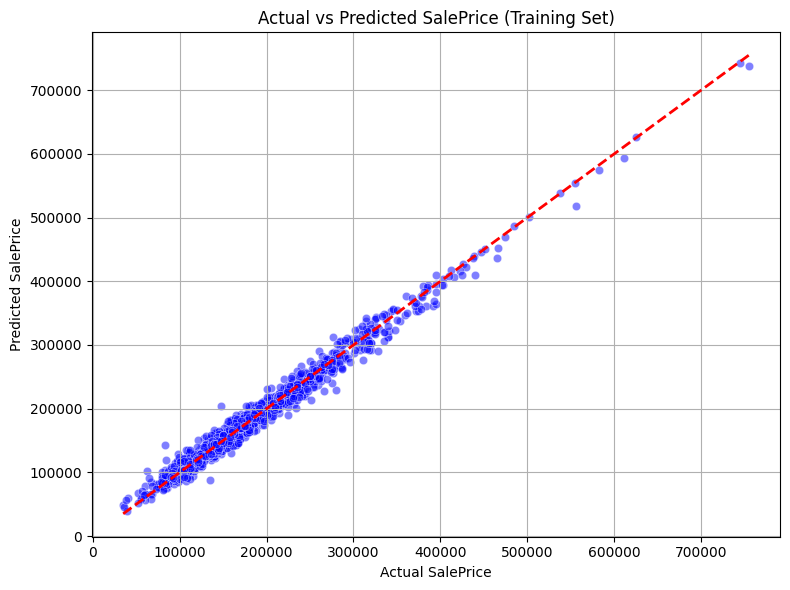

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=train_preds, alpha=0.5, color="blue")

# Plot the perfect prediction line
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Training Set)")
plt.grid(True)
plt.tight_layout()
plt.show()
